<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje - 2019-1 </h1>

<H3 align='center'> Tarea 1-Pregunta 2 </H3>
<H3 align='center'> Jorge Nuñez-Diego Alvarez  </H3>
<hr style="height:2px;border:none"/>


<a id="segundo"></a>
## 2. Selección de Atributos. 

En esta segunda parte de la tarea estudiaremos un _dataset_ llamado "House Sales in King County", un conjunto de datos de ventas de casas, con diversa información sobre las casas vendidas y los precios de venta. Por la naturaleza variada de las casas y las percepciones de las personas que las compran el problema de predecir el valor de una casa a ser vendida resulta interesante pues si bien muchos supuestos razonables se cumplen la mayoría de las veces (una casa más grande suele costar más que una más chica), la percepción de los compradores puede cambiar mucho por caracteristicas dificiles de medir. 

<img src="https://pngimage.net/wp-content/uploads/2018/06/house-for-sale-sign-png-6.png"  style="height:14cm;"  />


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error as mse

**2.a Cargar y visualizar la data**

In [2]:
data = pd.read_csv("kc_house_data.csv")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


En el dataset se informan 21 características diferentes de cada una de las casas registradas en él. Estas son:

|Category       | Descripción                                              |
|:-------------:|:--------------------------------------------------------:|
|id             | identificador numérico para una casa                     |
|date           | fecha en que la casa fue vendida                         |
|price          | variable objetivo (precio de venta de la casa)           |
|bedrooms       | cantidad de dormitorios                                  |
|bathrooms      | cantidad de baños                                        |
|sqft_living    | pies cuadrados construidos                               |
|sqft_lot       | pies cuadrados del terreno                               |
|floors         | cantidad de pisos                                        |
|waterfront     | 0 si no tiene vista a lago/mar, 1 en otro caso           | 
|view           | 0 si no ha sido visitada, 1 en otro caso                 |
|condition      | condición de la casa                                     |
|grade          | nota basado en el sistema de calificación de King County | 
|sqft_above     | pies cuadrados de la casa sin incluir el sótano          |
|sqft_basement  | pies cuadrados del sótano                                |
|yr_built       | año de construcción                                      |
|yr_renovated   | año de renovación/ampliación de la casa                  |  
|zipcode        | código postal                                            |
|lat            | latitud (ubicación de la casa)                           | 
|long           |longitud (ubicación de la casa)                           |
|sqft_living15  | pies cuadrados construidos en el año 2015                |
|sqft_lot15     | pies cuadrados del terreno en el año 2015                |

In [5]:
def to_num(date):
    nums = list(date)
    res = 0
    for i in range(8):
        res = res + int(nums[i])*(10**(7-i))
    return res
data['date'] = data.date.apply(to_num).rank()

In [6]:
data['date'].head()

0    10544.0
1    13682.5
2    16699.0
3    13682.5
4    16276.0
Name: date, dtype: float64

In [6]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10544.0,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,13682.5,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,16699.0,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,13682.5,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,16276.0,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null float64
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(6), int64(15)
memory usage: 3.5 MB


**Comentario**: El codigo transforma los datos de la columna date de 'object' a 'float', para posteriormente poder utlizar esta información.


A continuación se precede a elimar las columnas que no entregan información relevante en el análisis, en este caso 'id' que es el identificador numérico para una casa y 'zipcode' que representa el código postal de la casa.

In [8]:

data.drop(['id','zipcode'],axis=1,inplace=True)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,10544.0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,13682.5,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,16699.0,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,13682.5,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,16276.0,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [7]:
print(data.isna().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


**Comentario**: Se observa que las columnas no presentan datos faltantes.

**2.b Procesamiento y visualizacion de los datos**

In [10]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,10544.0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,13682.5,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,16699.0,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,13682.5,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,16276.0,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
5,545.5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,47.6561,-122.005,4760,101930
6,3805.5,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,47.3097,-122.327,2238,6819
7,15078.0,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,47.4095,-122.315,1650,9711
8,19755.0,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,47.5123,-122.337,1780,8113
9,17482.0,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,47.3684,-122.031,2390,7570


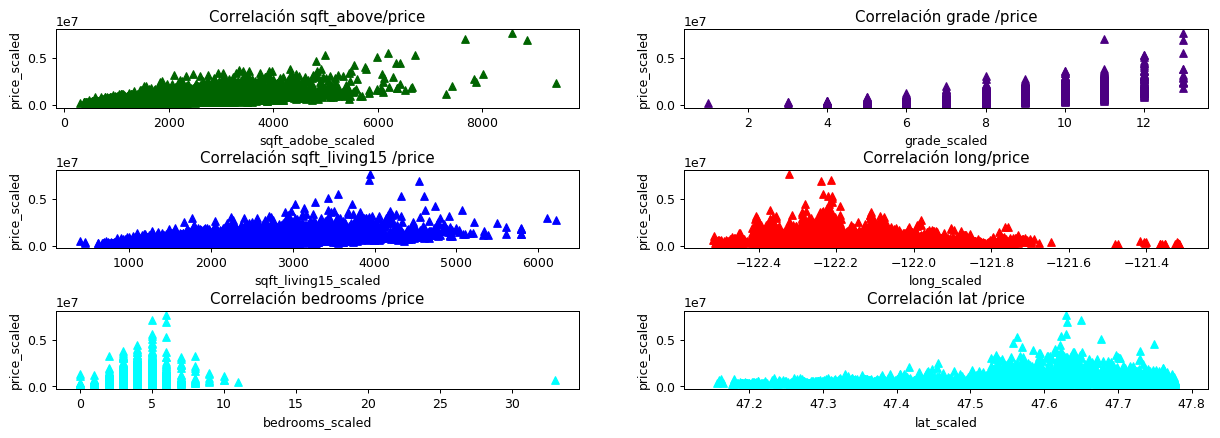

In [11]:

plt.figure(figsize=(8,4), dpi=90)

plt.subplot(3,2,1)
plt.scatter(data.sqft_above,data.price, color='darkgreen', marker='^')
plt.title('Correlación sqft_above/price')
plt.ylabel('price_scaled')
plt.xlabel('sqft_adobe_scaled')

plt.subplot(3,2,4)
plt.scatter(data.long,data.price, color='red', marker='^')
plt.title('Correlación long/price')
plt.ylabel('price_scaled')
plt.xlabel('long_scaled')

plt.subplot(3,2,3)
plt.scatter(data.sqft_living15 ,data.price, color='blue', marker='^')
plt.title('Correlación sqft_living15 /price')
plt.ylabel('price_scaled')
plt.xlabel('sqft_living15_scaled')

plt.subplot(3,2,2)
plt.scatter(data.grade ,data.price, color='indigo', marker='^')
plt.title('Correlación grade /price')
plt.ylabel('price_scaled')
plt.xlabel('grade_scaled')

plt.subplot(3,2,5)
plt.scatter(data.bedrooms ,data.price, color='cyan', marker='^')
plt.title('Correlación bedrooms /price')
plt.ylabel('price_scaled')
plt.xlabel('bedrooms_scaled')

plt.subplot(3,2,6)
plt.scatter(data.lat ,data.price, color='cyan', marker='^')
plt.title('Correlación lat /price')
plt.ylabel('price_scaled')
plt.xlabel('lat_scaled')

plt.subplots_adjust(top=4, bottom=3, left=0.4, right=2, hspace=0.8,
                    wspace=0.2)

plt.show()

**Comentarios:** De los gráficos de dispersión se observan fuertes correlaciones de las variables (sqft_adobe; bedrooms; lat; grade), respecto al gráfico long/price en 'rojo' se puede apreciar que en cierto intervalo los precios suben de manera lineal y depues de un punto disminuyen de forma lineal esto puede deberse que tan cerca o lejos nos encontramos de cierta zona en la ciudad.

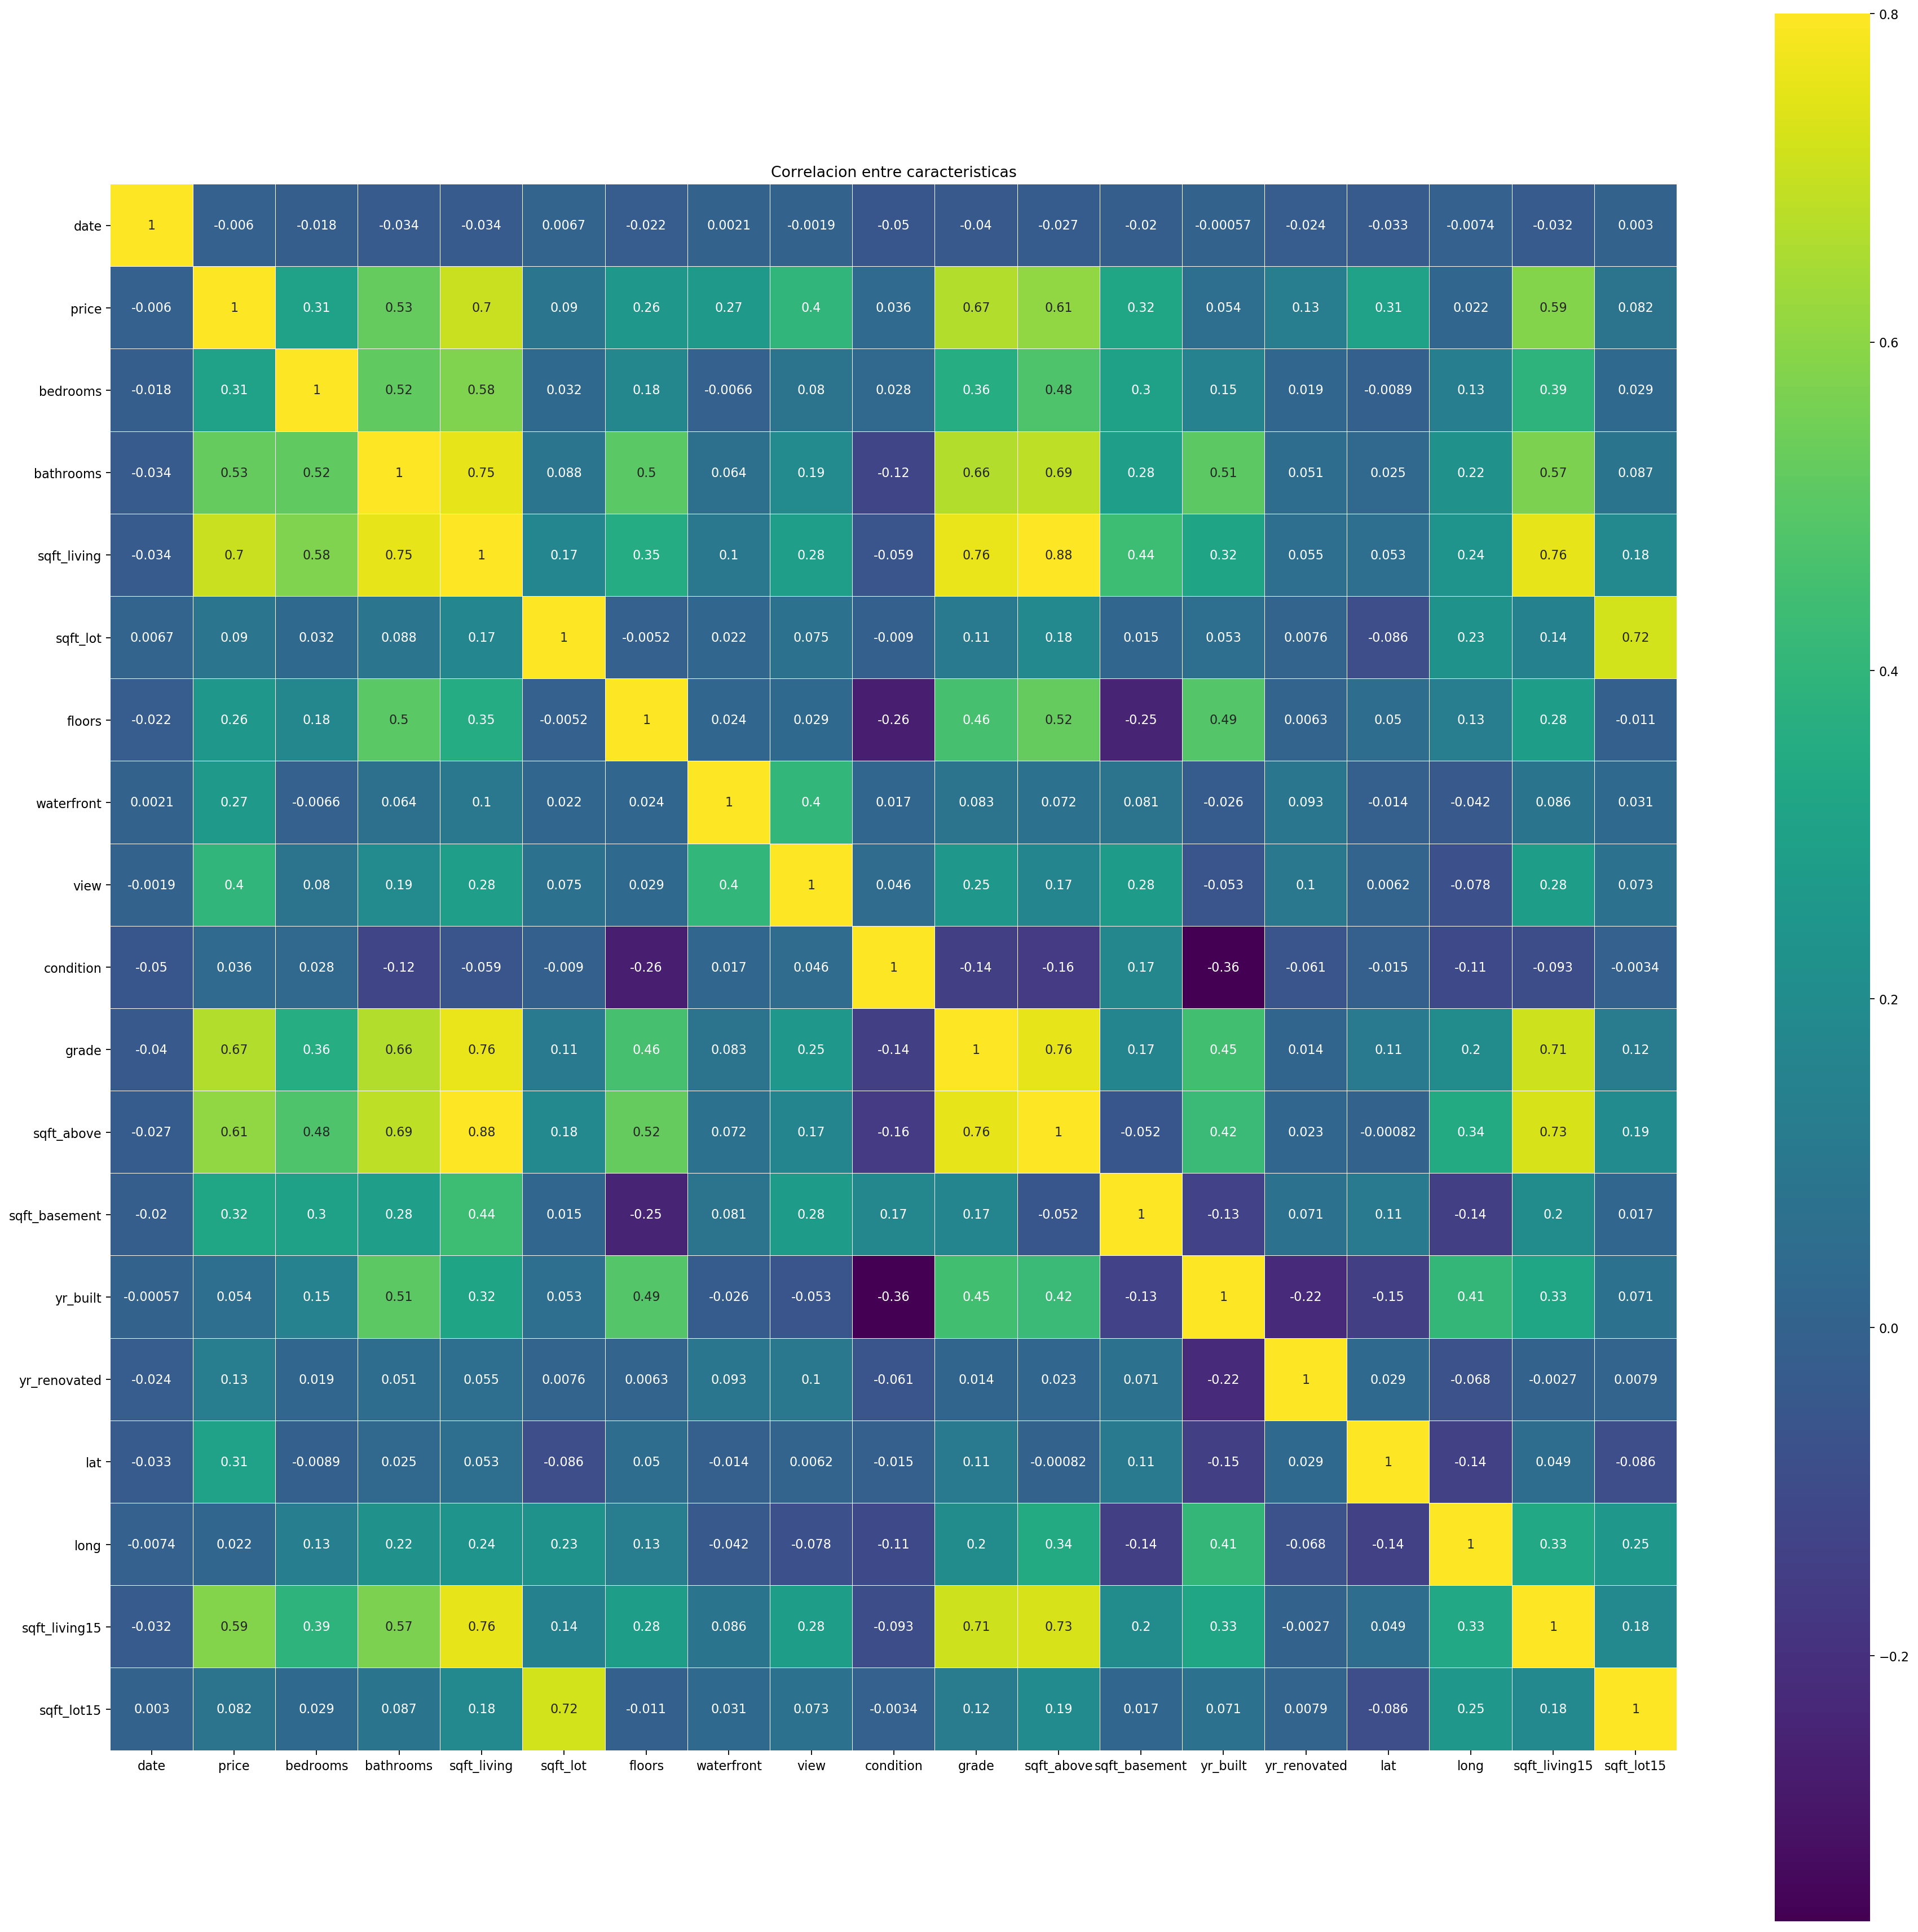

In [12]:
plt.figure(figsize=(28,28),dpi=160)
sns.heatmap(data.corr(), vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
sns.set(font_scale=1)
plt.title('Correlacion entre caracteristicas');
plt.show()

**2.c Selección de atributos by hand**

#### 2.c.1 Separación de los datos

In [13]:
data_pre_train, data_pre_temp = train_test_split(data, test_size= 0.25)
data_pre_val, data_pre_test = train_test_split(data_pre_temp, test_size= 0.4)



#### Escalar las datas por separado

In [14]:
scaler = StandardScaler().fit(data_pre_train)
data_train_scaled = pd.DataFrame(scaler.transform(data_pre_train),
                                 columns=data_pre_train.columns)

scaler = StandardScaler().fit(data_pre_val)
data_val_scaled = pd.DataFrame(scaler.transform(data_pre_val),
                                 columns=data_pre_val.columns)

scaler = StandardScaler().fit(data_pre_test)
data_test_scaled = pd.DataFrame(scaler.transform(data_pre_test),
                                 columns=data_pre_test.columns)



/home/jorge/anaconda3/envs/machinelearning/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jorge/anaconda3/envs/machinelearning/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/home/jorge/anaconda3/envs/machinelearning/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jorge/anaconda3/envs/machinelearning/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/home/jorge/anaconda3/envs/machinelearning/lib/python3.6/site-packages/sklearn/preprocessi

In [15]:
X_train = data_train_scaled
Y_t = X_train.pop('price')
Y_train = Y_t.values.reshape(-1,1)

X_val = data_val_scaled
Y_v = X_val.pop('price')
Y_val = Y_v.values.reshape(-1,1)

X_test = data_test_scaled
Y_tt = X_test.pop('price')
Y_test = Y_tt.values.reshape(-1,1)

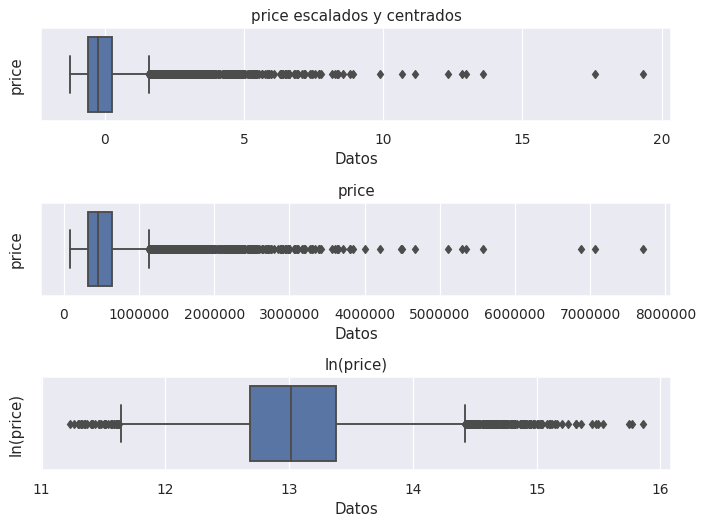

In [16]:
plt.figure(figsize=(8,6), dpi=90)
plt.subplot(3,1,3)
sns.boxplot(list(np.log(data['price'])))
plt.xlabel('Datos')
plt.ylabel('ln(price)')
plt.title('ln(price)')

plt.subplot(3,1,1)
sns.boxplot(list(Y_t))
plt.xlabel('Datos')
plt.ylabel('price')
plt.title('price escalados y centrados')

plt.subplot(3,1,2)
sns.boxplot(list(data['price']))
plt.xlabel('Datos')
plt.ylabel('price')
plt.title('price')

plt.tight_layout()
plt.show()

**Comentario:** Se visualiza las la distribución de los precios en la data los cuales
    se observa que están altamente sesgadoz hacia los valores de menor precio quedando
    outlaier los precios altos que están por sobre el millón. Luego al aplicar logaritmo 
    se observa que estos se distribuyen de foma mas normal quedando como outlaier los
    muy bajos y muy altos.

#### Se procede a realizar la selección de atributos by hand.

In [17]:

restantes = list(X_train.columns)
folds = KFold(n_splits=5)
actuales = []
errores = []
error_actual = np.mean((Y_train-np.mean(Y_train))**2)
contador = 0
while restantes:
    contador+=1
    if contador ==20:
        break
    error2 = 1
    for atributo_candidato in restantes:
        X_train_i = X_train[actuales+[atributo_candidato]]
        error_i = []
        for train_index,val_index in (folds.split(X_train_i)):
            y_i = Y_t
            y_tr = ((y_i.iloc[train_index]).values.reshape(-1,1))
            x_tr = X_train_i.iloc[train_index]
            y_vl = ((y_i.iloc[val_index]).values.reshape(-1,1))
            x_vl = X_train_i.iloc[val_index]      
            reg_scaled = LinearRegression()
            model = reg_scaled.fit(x_tr,y_tr)
            y_predict = model.predict(x_vl)
            error = mse(y_predict,y_vl)
            error_i.append(error)
        error_f = np.mean(error_i)
        if error2 > error_f:
            candidato = atributo_candidato
            error2=error_f
    errores.append(error2)
    actuales.append(candidato)
    restantes.remove(candidato) 
    
print(actuales)

['sqft_living', 'lat', 'view', 'grade', 'yr_built', 'waterfront', 'bedrooms', 'bathrooms', 'condition', 'date', 'long', 'sqft_above', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'sqft_basement', 'floors', 'sqft_lot']


**Comentarios:** Los resulatdos obtenidos consideran el dato que mas correlación presenta con el precio al comeinzo, pero hay variables entremedio que no presentan tan buena correlación, esto puede deberse a que no se ha probado con todas las combinaciones de ordenes para ir ingresando las variables existentes.

**2.d Validar**

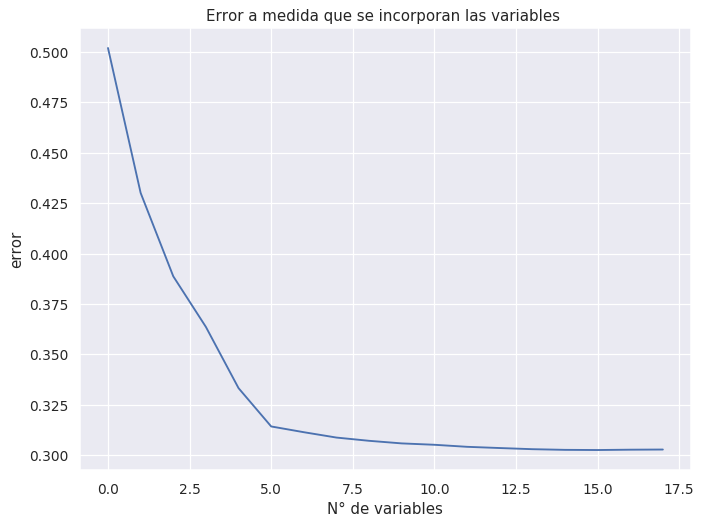

In [18]:
plt.figure(figsize=(8,6), dpi=90)
plt.plot(errores)

plt.xlabel('N° de variables')
plt.ylabel('error')
plt.title('Error a medida que se incorporan las variables ')

plt.tight_layout()
plt.show()

**Comentarios:** Se observa del gráfico como varia el error al ir ingresando las variables, cabe destacar que ya con las 5 primeras variables error disminuye considerablemente y con las 10 primeras variables el error tiende a estabilizarse, con lo cual podriamos entrenar un modelo con 5 variables ya obteniendo buenos resultados.

#### 2.e Mutual information
Calcule la Información Mutual para nuestros datos. Note que esta función ya esta implementada.
Que información puede obtener de estos resultados? Concuerdan los datos encontrados con lo encontrado en la pregunta anterior? 

In [19]:
from sklearn.feature_selection import mutual_info_regression
X=X_train
Y=Y_train
mi = list(zip(mutual_info_regression(X, Y),X.columns))


/home/jorge/anaconda3/envs/machinelearning/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
mi

[(0.0, 'date'),
 (0.07850584460418597, 'bedrooms'),
 (0.20548618368741778, 'bathrooms'),
 (0.3597121730748851, 'sqft_living'),
 (0.05958010374864564, 'sqft_lot'),
 (0.07642650701032316, 'floors'),
 (0.0059922296073964265, 'waterfront'),
 (0.053514154883713694, 'view'),
 (0.014135011366183114, 'condition'),
 (0.3548111675474708, 'grade'),
 (0.2649410592530135, 'sqft_above'),
 (0.07174654104812772, 'sqft_basement'),
 (0.07319629113095427, 'yr_built'),
 (0.0, 'yr_renovated'),
 (0.336192746055306, 'lat'),
 (0.12533273879215745, 'long'),
 (0.26480655529281183, 'sqft_living15'),
 (0.07931399556565566, 'sqft_lot15')]

**Comentarios:** mutual info mide información mutua entre dos variables, 0 si dos variables son independientes valores mas altos significan mayor dependencia los resultados con mas información compartida coinciden con los vistos en la matrix de correlación y los resultados obtenidos en la parte anteriror aunque no a cabalidad .

#### 2.f Más variables
Repita lo realizado en la pregunta 2.c (incluyendo gráficos) pero agregando la variable categorica `zipcode` utilizando nuevamente `pd.get_dummies`. Esta vez puede optar por no realizar _K-fold_ si no entrenar una sola vez cada modelo pues podría resultar demasiado demandante en tiempo utilizar _K-fold_, aunque siempre es valorado. 
Qué modelo se comporta mejor y por qué cree que sucede esto? 

#### Se actualizan los datos para poder trabajar con la variable zipcode que se habia eliminado al comienzo y transformar zipcode aplicando get_dummies.

In [30]:
data = pd.read_csv("kc_house_data.csv")
def to_num(date):
    nums = list(date)
    res = 0
    for i in range(8):
        res = res + int(nums[i])*(10**(7-i))
    return res
data['date'] = data.date.apply(to_num).rank()

data.drop(['id'],axis=1,inplace=True)

data_pre = pd.get_dummies(data.zipcode)
data = data.drop(columns=['zipcode'])
data = pd.concat([data,data_pre],axis=1)

In [32]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,10544.0,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,0,0,0,0,0,1,0,0,0
1,13682.5,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
2,16699.0,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
3,13682.5,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
4,16276.0,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0


In [33]:
data_pre_train, data_pre_temp = train_test_split(data, test_size= 0.25)
data_pre_val, data_pre_test = train_test_split(data_pre_temp, test_size= 0.4)

scaler = StandardScaler().fit(data_pre_train)
data_train_scaled = pd.DataFrame(scaler.transform(data_pre_train),
                                 columns=data_pre_train.columns)

scaler = StandardScaler().fit(data_pre_val)
data_val_scaled = pd.DataFrame(scaler.transform(data_pre_val),
                                 columns=data_pre_val.columns)

scaler = StandardScaler().fit(data_pre_test)
data_test_scaled = pd.DataFrame(scaler.transform(data_pre_test),
                                 columns=data_pre_test.columns)

X_train = data_train_scaled
Y_t = X_train.pop('price')


X_val = data_val_scaled
Y_v = X_val.pop('price')


X_test = data_test_scaled
Y_tt = X_test.pop('price')


/home/jorge/anaconda3/envs/machinelearning/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jorge/anaconda3/envs/machinelearning/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """
/home/jorge/anaconda3/envs/machinelearning/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jorge/anaconda3/envs/machinelearning/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
/home/jorge/anaconda3/envs/machin

In [35]:
restantes = list(X_train.columns)
folds = KFold(n_splits=5)
actuales = []
errores = []
error_actual = np.mean((Y_train-np.mean(Y_train))**2)
contador = 0
while restantes:
    contador+=1
    if contador ==100:
        break
    error2 = 1
    for atributo_candidato in restantes:
        X_train_i = X_train[actuales+[atributo_candidato]]
        error_i = []
        for train_index,val_index in (folds.split(X_train_i)):
            y_i = Y_t
            y_tr = ((y_i.iloc[train_index]).values.reshape(-1,1))
            x_tr = X_train_i.iloc[train_index]
            y_vl = ((y_i.iloc[val_index]).values.reshape(-1,1))
            x_vl = X_train_i.iloc[val_index]      
            reg_scaled = LinearRegression()
            model = reg_scaled.fit(x_tr,y_tr)
            y_predict = model.predict(x_vl)
            error = mse(y_predict,y_vl)
            error_i.append(error)
        error_f = np.mean(error_i)
        if error2 > error_f:
            candidato = atributo_candidato
            error2=error_f
    errores.append(error2)
    actuales.append(candidato)
    restantes.remove(candidato) 
    
print(actuales)

['sqft_living', 'lat', 'view', 98004, 'grade', 'yr_built', 'waterfront', 98039, 98112, 98040, 98105, 98033, 'bedrooms', 'bathrooms', 98119, 98102, 98199, 98006, 98109, 98155, 98028, 98133, 98019, 98011, 'sqft_above', 'condition', 98077, 98072, 'date', 98034, 98125, 98022, 98014, 98177, 98122, 98116, 98178, 98053, 'floors', 98052, 98074, 98065, 98058, 98056, 98136, 98144, 98103, 98107, 98010, 98115, 98005, 'yr_renovated', 98117, 98029, 98126, 98008, 98027, 98118, 'sqft_basement', 98007, 98106, 'sqft_lot', 98188, 98024, 'long', 98075, 98002, 98146, 98023, 98108, 98001, 98003, 98070, 98030, 'sqft_living15', 98038, 98045, 98059, 98198, 98031, 98092, 98166, 98032, 98148, 98168, 98042, 98055, 'sqft_lot15']


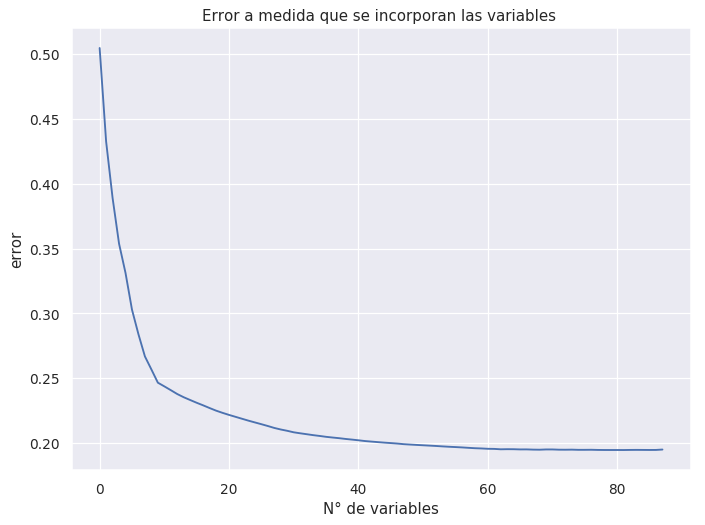

In [36]:
plt.figure(figsize=(8,6), dpi=90)
plt.plot(errores)

plt.xlabel('N° de variables')
plt.ylabel('error')
plt.title('Error a medida que se incorporan las variables ')

plt.tight_layout()
plt.show()

**Comentarios:** Se observa del gráfico que el error mejora considerablemente al incorporar la variable dummy(zipcode) al considerar los 10 primeros atributos el error ya es mas bajo que al considerar los 18 atributos anterirores, al considerar 40 atributos el error es aproximadamente 0.2 pero ya con un mayor recurso computacional. 